In [1]:
import pandas as pd

# load the dataset
df = pd.read_csv('netflix_reviews.csv')

In [2]:
# display the first few rows
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,86732f53-789d-4ee0-86a5-a9153d8b7305,MichaelR Dean,Not working,1,0,8.130.0 build 3 50815,2024-11-04 13:21:10,8.130.0 build 3 50815
1,173e5daf-ba3f-44cb-8983-564aaf9aa690,Mahira Baba,this is the worst app ever,1,0,8.138.1 build 10 50974,2024-11-04 13:19:17,8.138.1 build 10 50974
2,a31836f7-5e0a-47f6-87d6-ae630c1687ff,none none,Not truck driver friendly. Always asking for a...,2,0,8.138.1 build 10 50974,2024-11-04 12:59:43,8.138.1 build 10 50974
3,87bce191-331d-4233-abff-0677d0157063,Noly Versoza,I'm never subscribe your apps why you get a pa...,1,0,8.138.1 build 10 50974,2024-11-04 12:45:22,8.138.1 build 10 50974
4,83955939-e76a-4231-8aba-ab6044b7d292,Siddharth Agarwal,I love the free games offered by them,5,0,8.74.0 build 6 50443,2024-11-04 12:41:09,8.74.0 build 6 50443


In [3]:
# get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118335 entries, 0 to 118334
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              118335 non-null  object
 1   userName              118333 non-null  object
 2   content               118333 non-null  object
 3   score                 118335 non-null  int64 
 4   thumbsUpCount         118335 non-null  int64 
 5   reviewCreatedVersion  100456 non-null  object
 6   at                    118335 non-null  object
 7   appVersion            100456 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.2+ MB


In [4]:
# check for missing values
df.isnull().sum()

# view basic statistics
df.describe()

,score,thumbsUpCount
count,118335.000000,118335.000000
mean,2.821219,10.072675
std,1.706352,99.360341
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [5]:
# remove rows with missing "content" values
df = df.dropna(subset=['content'])

In [6]:
import re

# define a function for basic text cleaning
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# apply the function to the "content" column
df['cleaned_content'] = df['content'].apply(clean_text)

In [7]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content
0,86732f53-789d-4ee0-86a5-a9153d8b7305,MichaelR Dean,Not working,1,0,8.130.0 build 3 50815,2024-11-04 13:21:10,8.130.0 build 3 50815,not working
1,173e5daf-ba3f-44cb-8983-564aaf9aa690,Mahira Baba,this is the worst app ever,1,0,8.138.1 build 10 50974,2024-11-04 13:19:17,8.138.1 build 10 50974,this is the worst app ever
2,a31836f7-5e0a-47f6-87d6-ae630c1687ff,none none,Not truck driver friendly. Always asking for a...,2,0,8.138.1 build 10 50974,2024-11-04 12:59:43,8.138.1 build 10 50974,not truck driver friendly always asking for a ...
3,87bce191-331d-4233-abff-0677d0157063,Noly Versoza,I'm never subscribe your apps why you get a pa...,1,0,8.138.1 build 10 50974,2024-11-04 12:45:22,8.138.1 build 10 50974,im never subscribe your apps why you get a pay...
4,83955939-e76a-4231-8aba-ab6044b7d292,Siddharth Agarwal,I love the free games offered by them,5,0,8.74.0 build 6 50443,2024-11-04 12:41:09,8.74.0 build 6 50443,i love the free games offered by them


In [8]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org nltk

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

# Set the NLTK data path explicitly
nltk.data.path.append('~/nltk_data')

# Initialize the tokenizer
tokenizer = TreebankWordTokenizer()

stop_words = set(stopwords.words('english'))
# manually remove "not" and "no" from stop words to retain negations
stop_words.remove("not")
stop_words.remove("no")

def tokenize_and_remove_stopwords(text):
    # Use TreebankWordTokenizer directly instead of word_tokenize
    tokens = tokenizer.tokenize(str(text))
    # remove stopwords but keep important negations
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# apply the function to the 'cleaned_content' column
df['processed_content'] = df['cleaned_content'].apply(tokenize_and_remove_stopwords)

In [10]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,processed_content
0,86732f53-789d-4ee0-86a5-a9153d8b7305,MichaelR Dean,Not working,1,0,8.130.0 build 3 50815,2024-11-04 13:21:10,8.130.0 build 3 50815,not working,not working
1,173e5daf-ba3f-44cb-8983-564aaf9aa690,Mahira Baba,this is the worst app ever,1,0,8.138.1 build 10 50974,2024-11-04 13:19:17,8.138.1 build 10 50974,this is the worst app ever,worst app ever
2,a31836f7-5e0a-47f6-87d6-ae630c1687ff,none none,Not truck driver friendly. Always asking for a...,2,0,8.138.1 build 10 50974,2024-11-04 12:59:43,8.138.1 build 10 50974,not truck driver friendly always asking for a ...,not truck driver friendly always asking code y...
3,87bce191-331d-4233-abff-0677d0157063,Noly Versoza,I'm never subscribe your apps why you get a pa...,1,0,8.138.1 build 10 50974,2024-11-04 12:45:22,8.138.1 build 10 50974,im never subscribe your apps why you get a pay...,im never subscribe apps get payment gcash
4,83955939-e76a-4231-8aba-ab6044b7d292,Siddharth Agarwal,I love the free games offered by them,5,0,8.74.0 build 6 50443,2024-11-04 12:41:09,8.74.0 build 6 50443,i love the free games offered by them,love free games offered


In [11]:
# define a function to label sentiment
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['score'].apply(label_sentiment)

In [12]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,processed_content,sentiment
0,86732f53-789d-4ee0-86a5-a9153d8b7305,MichaelR Dean,Not working,1,0,8.130.0 build 3 50815,2024-11-04 13:21:10,8.130.0 build 3 50815,not working,not working,negative
1,173e5daf-ba3f-44cb-8983-564aaf9aa690,Mahira Baba,this is the worst app ever,1,0,8.138.1 build 10 50974,2024-11-04 13:19:17,8.138.1 build 10 50974,this is the worst app ever,worst app ever,negative
2,a31836f7-5e0a-47f6-87d6-ae630c1687ff,none none,Not truck driver friendly. Always asking for a...,2,0,8.138.1 build 10 50974,2024-11-04 12:59:43,8.138.1 build 10 50974,not truck driver friendly always asking for a ...,not truck driver friendly always asking code y...,negative
3,87bce191-331d-4233-abff-0677d0157063,Noly Versoza,I'm never subscribe your apps why you get a pa...,1,0,8.138.1 build 10 50974,2024-11-04 12:45:22,8.138.1 build 10 50974,im never subscribe your apps why you get a pay...,im never subscribe apps get payment gcash,negative
4,83955939-e76a-4231-8aba-ab6044b7d292,Siddharth Agarwal,I love the free games offered by them,5,0,8.74.0 build 6 50443,2024-11-04 12:41:09,8.74.0 build 6 50443,i love the free games offered by them,love free games offered,positive


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # adjust max_features if needed

# fit and transform the 'processed_content' column
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_content'])

# convert to a dataframe for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# display the first few rows of the TF-IDF features
tfidf_df.head()

,aa,aap,abc,abd,ability,abit,able,abroad,abruptly,absolute,...,youve,yr,yrs,yt,zee,zenfone,zero,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# check the non-zero TF-IDF values for specific rows
tfidf_df.iloc[0].sort_values(ascending=False).head(10)

working     0.865379
not         0.501119
able        0.000000
abroad      0.000000
wouldve     0.000000
accurate    0.000000
yellow      0.000000
yang        0.000000
abruptly    0.000000
absolute    0.000000
Name: 0, dtype: float64

In [15]:
# inspect the top terms for each document
for i in range(5):
    print(f"Top terms for review {i}:")
    top_terms = tfidf_df.iloc[i].sort_values(ascending=False).head(5)
    print(top_terms)
    print("\n")

Top terms for review 0:
working    0.865379
not        0.501119
able       0.000000
abroad     0.000000
wouldve    0.000000
Name: 0, dtype: float64


Top terms for review 1:
worst      0.703511
ever       0.648147
app        0.291510
abroad     0.000000
wouldve    0.000000
Name: 1, dtype: float64


Top terms for review 2:
driver         0.395265
truck          0.393868
middle         0.279450
code           0.259082
downloading    0.243469
Name: 2, dtype: float64


Top terms for review 3:
gcash        0.608581
subscribe    0.426793
payment      0.333904
apps         0.331832
never        0.318183
Name: 3, dtype: float64


Top terms for review 4:
offered    0.686465
games      0.531987
free       0.409073
love       0.280027
wouldve    0.000000
Name: 4, dtype: float64




In [16]:
# get the overall top terms in the dataset
# sum up the TF-IDF scores for each term across all documents
total_tfidf = tfidf_df.sum().sort_values(ascending=False)
print("Top 10 terms in the dataset by TF-IDF score:")
print(total_tfidf.head(20))

Top 10 terms in the dataset by TF-IDF score:
app        5513.819939
netflix    5101.984104
movies     4056.081110
not        3985.495607
good       3769.098481
watch      3545.219460
shows      3108.274132
love       2861.720154
like       2407.569286
great      2349.934579
cant       2347.872838
please     1967.945340
no         1847.061795
dont       1798.434477
tv         1746.123738
phone      1715.807512
movie      1678.587049
even       1674.155046
series     1651.465102
best       1647.789989
dtype: float64


In [17]:
%pip install rank_bm25

Note: you may need to restart the kernel to use updated packages.


In [18]:
from rank_bm25 import BM25Okapi

# tokenize the preprocessed content for BM25
tokenized_corpus = [text.split() for text in df['processed_content']]

# initialize the BM25 model
bm25 = BM25Okapi(tokenized_corpus)

# example: rank reviews based on a sample query
query = "app not working"
tokenized_query = query.split()
bm25_scores = bm25.get_scores(tokenized_query)

# add BM25 scores as a new column in the dataframe
df['bm25_score'] = bm25_scores

# display the updated dataframe
df[['processed_content', 'bm25_score']].head()

,processed_content,bm25_score
0,not working,7.127126
1,worst app ever,1.067386
2,not truck driver friendly always asking code y...,1.331378
3,im never subscribe apps get payment gcash,0.000000
4,love free games offered,0.000000


In [19]:
%pip install --user ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [20]:
# preprocess the netflix revies and build an index

import os
import json
from tqdm.notebook import tqdm  # Use notebook-friendly progress bar

def preprocess_reviews(input_df, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for i, row in tqdm(input_df.iterrows(), total=input_df.shape[0], desc="Preprocessing reviews"):
        doc = {
            "id": str(i),
            "contents": row['processed_content']
        }
        with open(os.path.join(output_dir, f"doc{i}.json"), 'w') as out:
            json.dump(doc, out)

# Preprocess reviews and save them in 'processed_reviews' directory
preprocess_reviews(df, "processed_reviews")


Preprocessing reviews:   0%|          | 0/118333 [00:00<?, ?it/s]

In [21]:
!pip install pybind11 numpy

In [22]:
import os
import subprocess
import sys

def build_index(input_dir, index_dir):
    if os.path.exists(index_dir) and os.listdir(index_dir):
        print(f"Index already exists at {index_dir}. Skipping index building.")
        return
    
    # Use sys.executable to ensure the correct Python interpreter is used
    cmd = [
        sys.executable, "-m", "pyserini.index.lucene",
        "--collection", "JsonCollection",
        "--input", input_dir,
        "--index", index_dir,
        "--generator", "DefaultLuceneDocumentGenerator",
        "--threads", "1",
        "--storePositions", "--storeDocvectors", "--storeRaw"
    ]
    
    # Run the command
    subprocess.run(cmd, check=True)

# Build index
build_index("processed_reviews", "indexes/netflix_reviews")


Index already exists at indexes/netflix_reviews. Skipping index building.


In [23]:
%pip install faiss-cpu
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install --upgrade pip setuptools wheel

In [25]:
!pip install --no-deps --only-binary :all: pyserini

In [26]:
!pip install pyjnius

In [27]:
!pip install whoosh

In [28]:
from whoosh.index import create_in
from whoosh.fields import *
from whoosh.qparser import QueryParser
import os
import shutil  # For removing directory

def create_search_index(df, text_column):
    # Remove existing index directory if it exists
    if os.path.exists("whoosh_index"):
        shutil.rmtree("whoosh_index")
    
    # Create fresh index directory
    os.mkdir("whoosh_index")
    
    # Create schema
    schema = Schema(
        id=ID(stored=True),
        content=TEXT(stored=True)
    )
    
    # Create index
    ix = create_in("whoosh_index", schema)
    
    # Add documents from DataFrame
    writer = ix.writer()
    for idx, row in df.iterrows():
        writer.add_document(
            id=str(idx),
            content=str(row[text_column])
        )
    writer.commit()
    return ix

def search(query_text, index, top_k=10):
    with index.searcher() as searcher:
        query = QueryParser("content", index.schema).parse(query_text)
        results = searcher.search(query, limit=top_k)
        
        print(f"\nTop {top_k} results for query: '{query_text}'\n")
        for i, result in enumerate(results, 1):
            print(f"{i}. Score: {result.score}")
            print(f"   Content: {result['content'][:200]}...")
            print()

# Create index using 'content' as the column name
index = create_search_index(df, 'content')

# Perform search
search("app not working", index, top_k=10)


Top 10 results for query: 'app not working'

1. Score: 10.135517626512964
   Content: Netflix app is not working... After unstalling, I installed app... Still not working...

2. Score: 10.084237248948112
   Content: App isn't working properly.. in wifi app isn't working.. and only few times working in mobile data...

3. Score: 9.992297785768791
   Content: This app is not working this app is soo irritating and this is not working to login and plz don't download this app...

4. Score: 9.962910198033095
   Content: My Netflix app is not working.. When I put this app on download ...it is not working...Showing ...pending...

5. Score: 9.9030752839257
   Content: app is not working...

6. Score: 9.9030752839257
   Content: App is not working...

7. Score: 9.9030752839257
   Content: App not working...

8. Score: 9.9030752839257
   Content: App is not working...

9. Score: 9.9030752839257
   Content: App is not working...

10. Score: 9.9030752839257
   Content: The app is not working...



In [29]:
import numpy as np
from whoosh.qparser import QueryParser

# Example qrels (Relevance Judgments) for query "app not working"
qrels = {
    '0': {'0': 1, '2': 1, '5': 0},  # '1' means relevant, '0' means non-relevant
    '1': {'4': 1, '7': 1},          # Adjust docids as per your dataset
}

def dcg_at_k(relevances, k):
    """Compute DCG at k"""
    dcg = 0
    for i, rel in enumerate(relevances[:k]):
        dcg += rel / np.log2(i + 2)
    return dcg

def compute_ndcg(results, k=10):
    """Compute NDCG at k for search results"""
    relevances = [1.0 if "not working" in result['content'].lower() else 0.0 
                 for result in results[:k]]
    
    # Compute DCG
    dcg = dcg_at_k(relevances, k)
    
    # Compute IDCG (using perfect ordering)
    ideal_relevances = sorted(relevances, reverse=True)
    idcg = dcg_at_k(ideal_relevances, k)
    
    return dcg / idcg if idcg > 0 else 0.0

def compute_precision(results, k=10):
    """Compute Precision at k for search results"""
    relevant = sum(1 for result in results[:k] 
                  if "not working" in result['content'].lower())
    return relevant / k if k > 0 else 0.0

def evaluate_search(query_text, index, k=10):
    with index.searcher() as searcher:
        query = QueryParser("content", index.schema).parse(query_text)
        results = searcher.search(query, limit=k)
        
        # Convert results to list for multiple uses
        results_list = list(results)
        
        # Compute metrics
        ndcg = compute_ndcg(results_list, k)
        precision = compute_precision(results_list, k)
        
        print(f"\nEvaluation for query: '{query_text}'")
        print(f"NDCG@{k}: {ndcg:.4f}")
        print(f"Precision@{k}: {precision:.4f}")
        
        # Print results details
        print("\nDetailed Results:")
        for i, result in enumerate(results_list, 1):
            relevant = "not working" in result['content'].lower()
            print(f"{i}. Score: {result.score:.4f} | Relevant: {relevant}")
            print(f"   Content: {result['content'][:200]}...")
            print()

# Run evaluation
evaluate_search("app not working", index)


Evaluation for query: 'app not working'
NDCG@10: 0.9196
Precision@10: 0.9000

Detailed Results:
1. Score: 10.1355 | Relevant: True
   Content: Netflix app is not working... After unstalling, I installed app... Still not working...

2. Score: 10.0842 | Relevant: False
   Content: App isn't working properly.. in wifi app isn't working.. and only few times working in mobile data...

3. Score: 9.9923 | Relevant: True
   Content: This app is not working this app is soo irritating and this is not working to login and plz don't download this app...

4. Score: 9.9629 | Relevant: True
   Content: My Netflix app is not working.. When I put this app on download ...it is not working...Showing ...pending...

5. Score: 9.9031 | Relevant: True
   Content: app is not working...

6. Score: 9.9031 | Relevant: True
   Content: App is not working...

7. Score: 9.9031 | Relevant: True
   Content: App not working...

8. Score: 9.9031 | Relevant: True
   Content: App is not working...

9. Score: 9.9031 | Re

In [30]:
# Try different queries
evaluate_search("streaming quality", index)
evaluate_search("customer service", index)


Evaluation for query: 'streaming quality'
NDCG@10: 0.0000
Precision@10: 0.0000

Detailed Results:
1. Score: 13.3364 | Relevant: False
   Content: Quality streaming and easy to navigate!...

2. Score: 13.0576 | Relevant: False
   Content: Excellent quality streaming and excellent picture Quality. Something for everyone on Netflix....

3. Score: 12.9973 | Relevant: False
   Content: Every other video streaming app allows much higher quality video quality streaming while using tab s9...

4. Score: 12.9265 | Relevant: False
   Content: Excellent video quality and streaming service....

5. Score: 12.9265 | Relevant: False
   Content: Good in video quality and live streaming......

6. Score: 12.9265 | Relevant: False
   Content: Good for streaming series... And good quality...

7. Score: 12.7996 | Relevant: False
   Content: Good app but not videos streaming quality is not good its looking blur that's the only problem please improve video streaming quality...

8. Score: 12.5410 | Relevant: 

In [31]:
from whoosh.qparser import QueryParser
from whoosh.scoring import BM25F
import numpy as np

def evaluate_bm25_parameters(index, query_text, k1_values, b_values, k=10):
    def compute_metrics(results):
        # Convert results to list
        results_list = list(results)
        
        # Compute NDCG
        relevances = [1.0 if "not working" in result['content'].lower() else 0.0 
                     for result in results_list[:k]]
        dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevances))
        idcg = sum(sorted(relevances, reverse=True)[i] / np.log2(i + 2) 
                  for i in range(len(relevances)))
        ndcg = dcg / idcg if idcg > 0 else 0.0
        
        # Compute Precision
        precision = sum(1 for result in results_list[:k] 
                       if "not working" in result['content'].lower()) / k
        
        return ndcg, precision

    print(f"\nEvaluating BM25 parameters for query: '{query_text}'\n")
    print("Parameters | NDCG@10 | Precision@10 | Top Result Score")
    print("-" * 60)

    best_ndcg = 0
    best_params = None
    
    for k1 in k1_values:
        for b in b_values:
            # Configure BM25
            bm25f = BM25F(field_B={'content': b}, B=b, K1=k1)
            
            # Search with current parameters
            with index.searcher(weighting=bm25f) as searcher:
                query_obj = QueryParser("content", index.schema).parse(query_text)
                results = searcher.search(query_obj, limit=k)
                
                # Compute evaluation metrics
                ndcg, precision = compute_metrics(results)
                top_score = results[0].score if len(results) > 0 else 0
                
                # Print results
                print(f"k1={k1:4.1f}, b={b:3.1f} | {ndcg:7.4f} | {precision:11.4f} | {top_score:14.4f}")
                
                # Track best parameters
                if ndcg > best_ndcg:
                    best_ndcg = ndcg
                    best_params = (k1, b)
    
    print("\nBest parameters:")
    print(f"k1={best_params[0]}, b={best_params[1]} (NDCG={best_ndcg:.4f})")
    
    # Show detailed results for best parameters
    print("\nDetailed results with best parameters:")
    bm25f = BM25F(field_B={'content': best_params[1]}, B=best_params[1], K1=best_params[0])
    with index.searcher(weighting=bm25f) as searcher:
        query_obj = QueryParser("content", index.schema).parse(query_text)
        results = searcher.search(query_obj, limit=k)
        
        for i, result in enumerate(results, 1):
            relevant = "not working" in result['content'].lower()
            print(f"\n{i}. Score: {result.score:.4f} | Relevant: {relevant}")
            print(f"   Content: {result['content'][:200]}...")

# Define parameter ranges to test
k1_values = [0.5, 1.0, 1.5]
b_values = [0.2, 0.6, 1.0]

# Run evaluation
evaluate_bm25_parameters(index, "app not working", k1_values, b_values)

# Print index statistics
print(f"\nTotal documents in index: {index.doc_count()}")


Evaluating BM25 parameters for query: 'app not working'

Parameters | NDCG@10 | Precision@10 | Top Result Score
------------------------------------------------------------
k1= 0.5, b=0.2 |  0.9224 |      0.7000 |         7.9819
k1= 0.5, b=0.6 |  0.7698 |      0.7000 |         8.0999
k1= 0.5, b=1.0 |  0.9938 |      0.9000 |         8.9460
k1= 1.0, b=0.2 |  0.9224 |      0.7000 |         9.2412
k1= 1.0, b=0.6 |  0.7698 |      0.7000 |         9.4856
k1= 1.0, b=1.0 |  0.9938 |      0.9000 |        11.3617
k1= 1.5, b=0.2 |  0.9224 |      0.7000 |        10.2105
k1= 1.5, b=0.6 |  0.7761 |      0.7000 |        10.5767
k1= 1.5, b=1.0 |  1.0000 |      1.0000 |        13.5585

Best parameters:
k1=1.5, b=1.0 (NDCG=1.0000)

Detailed results with best parameters:

1. Score: 13.5585 | Relevant: True
   Content: app is not working...

2. Score: 13.5585 | Relevant: True
   Content: App is not working...

3. Score: 13.5585 | Relevant: True
   Content: App not working...

4. Score: 13.5585 | Relevant

In [32]:
from whoosh.qparser import QueryParser
from whoosh.scoring import BM25F
import numpy as np

def compute_metrics_for_query(results, query_text, k=10):
    """Compute NDCG and Precision for a single query results"""
    # Convert results to list
    results_list = list(results)
    
    # Get query terms
    query_terms = set(query_text.lower().split())
    
    # Compute relevances
    relevances = [1.0 if any(term in result['content'].lower() for term in query_terms) 
                 else 0.0 for result in results_list[:k]]
    
    # Compute DCG
    dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevances))
    idcg = sum(sorted(relevances, reverse=True)[i] / np.log2(i + 2) 
              for i in range(len(relevances)))
    ndcg = dcg / idcg if idcg > 0 else 0.0
    
    # Compute Precision
    precision = sum(1 for rel in relevances if rel > 0) / k
    
    return ndcg, precision

def evaluate_queries(index, queries, k=10):
    """Evaluate multiple queries using BM25"""
    # Use default BM25 parameters
    bm25f = BM25F(B=0.75, K1=1.2)
    
    print("Query Evaluation Results")
    print("=" * 50)
    
    all_ndcg = []
    all_precision = []
    
    for query in queries:
        with index.searcher(weighting=bm25f) as searcher:
            # Parse and search
            query_obj = QueryParser("content", index.schema).parse(query)
            results = searcher.search(query_obj, limit=k)
            
            # Compute metrics
            ndcg, precision = compute_metrics_for_query(results, query, k)
            
            all_ndcg.append(ndcg)
            all_precision.append(precision)
            
            # Print results for this query
            print(f"\nQuery: '{query}'")
            print(f"NDCG@{k}: {ndcg:.4f}")
            print(f"Precision@{k}: {precision:.4f}")
            
            # Show top 3 results
            print("\nTop 3 Results:")
            for i, result in enumerate(results[:3], 1):
                relevant = any(term in result['content'].lower() 
                             for term in query.lower().split())
                print(f"{i}. Score: {result.score:.4f} | Relevant: {relevant}")
                print(f"   Content: {result['content'][:200]}...")
    
    # Print average metrics
    print("\nOverall Performance")
    print("=" * 50)
    print(f"Average NDCG@{k}: {np.mean(all_ndcg):.4f}")
    print(f"Average Precision@{k}: {np.mean(all_precision):.4f}")

# Define queries to evaluate
queries = [
    "app crashes",
    "video buffering",
    "login issues",
    "app not working",
    "streaming quality"
]

# Run evaluation
evaluate_queries(index, queries, k=10)

Query Evaluation Results

Query: 'app crashes'
NDCG@10: 1.0000
Precision@10: 1.0000

Top 3 Results:
1. Score: 11.9054 | Relevant: True
   Content: App crashes every time...
2. Score: 11.9054 | Relevant: True
   Content: Terrible app. Constantly crashes....
3. Score: 11.9054 | Relevant: True
   Content: your app is garbage. constantly crashes....

Query: 'video buffering'
NDCG@10: 1.0000
Precision@10: 1.0000

Top 3 Results:
1. Score: 15.9517 | Relevant: True
   Content: Simultaneously loading.. Video is buffering......
2. Score: 15.0004 | Relevant: True
   Content: Unable to play video's on app, it's buffering forever....
3. Score: 15.0004 | Relevant: True
   Content: The app keeps on buffering during when video's are playing...

Query: 'login issues'
NDCG@10: 1.0000
Precision@10: 1.0000

Top 3 Results:
1. Score: 17.1598 | Relevant: True
   Content: I have login issues, I can't login into the account...
2. Score: 15.9494 | Relevant: True
   Content: Login issues continuously appearing..

In [33]:
from whoosh.qparser import QueryParser
from whoosh.scoring import BM25F
import numpy as np

def evaluate_parameters_across_queries(index, queries, k1_values, b_values, k=10):
    """Find best BM25 parameters across multiple queries"""
    
    best_ndcg = 0
    best_params = None
    results_by_params = {}
    
    print("Evaluating BM25 parameters across queries")
    print("=" * 50)
    
    for k1 in k1_values:
        for b in b_values:
            # Configure BM25
            bm25f = BM25F(field_B={'content': b}, B=b, K1=k1)
            ndcg_scores = []
            precision_scores = []
            
            # Test parameters on each query
            for query in queries:
                with index.searcher(weighting=bm25f) as searcher:
                    query_obj = QueryParser("content", index.schema).parse(query)
                    results = searcher.search(query_obj, limit=k)
                    
                    # Compute metrics
                    query_terms = set(query.lower().split())
                    results_list = list(results)
                    
                    # Compute relevances
                    relevances = [1.0 if any(term in result['content'].lower() 
                                           for term in query_terms) 
                                else 0.0 for result in results_list[:k]]
                    
                    # Compute DCG
                    dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevances))
                    idcg = sum(sorted(relevances, reverse=True)[i] / np.log2(i + 2) 
                              for i in range(len(relevances)))
                    ndcg = dcg / idcg if idcg > 0 else 0.0
                    
                    ndcg_scores.append(ndcg)
                    
                    # Compute Precision
                    precision = sum(1 for rel in relevances if rel > 0) / k
                    precision_scores.append(precision)
            
            # Calculate average metrics for this parameter combination
            avg_ndcg = np.mean(ndcg_scores)
            avg_precision = np.mean(precision_scores)
            
            # Store results
            results_by_params[(k1, b)] = {
                'ndcg': avg_ndcg,
                'precision': avg_precision
            }
            
            # Update best parameters if needed
            if avg_ndcg > best_ndcg:
                best_ndcg = avg_ndcg
                best_params = (k1, b)
            
            print(f"\nParameters: k1={k1:.1f}, b={b:.1f}")
            print(f"Average NDCG@{k}: {avg_ndcg:.4f}")
            print(f"Average Precision@{k}: {avg_precision:.4f}")
    
    # Print best parameters and detailed results
    print("\nBest Parameters Found")
    print("=" * 50)
    print(f"k1={best_params[0]:.1f}, b={best_params[1]:.1f}")
    print(f"Best average NDCG@{k}: {best_ndcg:.4f}")
    
    # Show detailed results with best parameters
    print("\nDetailed results with best parameters:")
    bm25f = BM25F(field_B={'content': best_params[1]}, B=best_params[1], K1=best_params[0])
    
    for query in queries:
        print(f"\nQuery: '{query}'")
        with index.searcher(weighting=bm25f) as searcher:
            query_obj = QueryParser("content", index.schema).parse(query)
            results = searcher.search(query_obj, limit=3)  # Show top 3 results
            
            for i, result in enumerate(results, 1):
                relevant = any(term in result['content'].lower() 
                             for term in query.lower().split())
                print(f"{i}. Score: {result.score:.4f} | Relevant: {relevant}")
                print(f"   Content: {result['content'][:200]}...")

# Define parameter ranges and queries
k1_values = [0.5, 1.0, 1.5]
b_values = [0.2, 0.6, 1.0]

queries = [
    "app crashes",
    "video buffering",
    "login issues",
    "app not working",
    "streaming quality"
]

# Run parameter optimization
evaluate_parameters_across_queries(index, queries, k1_values, b_values)

Evaluating BM25 parameters across queries

Parameters: k1=0.5, b=0.2
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=0.5, b=0.6
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=0.5, b=1.0
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=1.0, b=0.2
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=1.0, b=0.6
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=1.0, b=1.0
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=1.5, b=0.2
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=1.5, b=0.6
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Parameters: k1=1.5, b=1.0
Average NDCG@10: 1.0000
Average Precision@10: 1.0000

Best Parameters Found
k1=0.5, b=0.2
Best average NDCG@10: 1.0000

Detailed results with best parameters:

Query: 'app crashes'
1. Score: 9.6791 | Relevant: True
   Content: Latest update. ..if u are on the previous version, the one prior

In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'score' is the target variable
X = tfidf_df  # Use TF-IDF features as input for now
y = df['score']  # Target: sentiment scores (1-5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (94666, 5000)
Testing set size: (23667, 5000)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           1       0.67      0.91      0.77      9289
           2       0.25      0.03      0.05      2218
           3       0.32      0.13      0.19      2456
           4       0.40      0.24      0.30      2842
           5       0.71      0.84      0.77      6862

    accuracy                           0.65     23667
   macro avg       0.47      0.43      0.42     23667
weighted avg       0.57      0.65      0.59     23667

Accuracy: 0.6461


In [36]:
!pip install seaborn

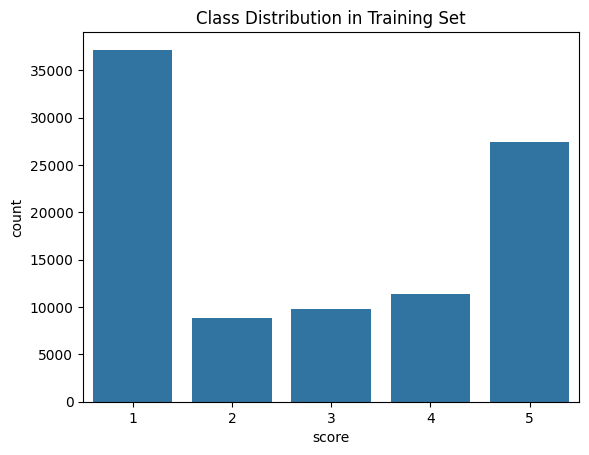

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.show()


In [38]:
from sklearn.feature_extraction.text import CountVectorizer  # Simpler than TF-IDF
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def train_fast_classifier(df, text_column='content', test_size=0.2, random_state=42):
    """
    Train a fast text classifier using MultinomialNB and simple CountVectorizer
    """
    # Create binary labels (1 for "not working" mentions, 0 for others)
    labels = df[text_column].str.contains('not working', case=False).astype(int)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        df[text_column], 
        labels,
        test_size=test_size,
        random_state=random_state
    )
    
    # Create and fit the vectorizer with limited features
    vectorizer = CountVectorizer(
        max_features=1000,  # Reduced features
        stop_words='english'  # Remove common words
    )
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Train MultinomialNB
    print("Training classifier...")
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    
    # Predict and evaluate
    print("\nEvaluating classifier...")
    y_pred = clf.predict(X_test_vec)
    
    # Print results
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    return clf, vectorizer, X_test, y_test

# Train the classifier
classifier, vectorizer, X_test, y_test = train_fast_classifier(df)

# Example: Make predictions on new queries
test_queries = [
    "app not working on my phone",
    "great streaming quality",
    "login issues and crashes",
    "excellent service",
    "app keeps failing to load"
]

# Predict on test queries
X_test_queries = vectorizer.transform(test_queries)
predictions = classifier.predict(X_test_queries)
probabilities = classifier.predict_proba(X_test_queries)

print("\nTest Query Predictions:")
for query, pred, prob in zip(test_queries, predictions, probabilities):
    print(f"\nQuery: '{query}'")
    print(f"Prediction: {'Issue' if pred == 1 else 'No Issue'}")
    print(f"Confidence: {max(prob):.4f}")

Training classifier...

Evaluating classifier...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23221
           1       0.20      0.75      0.32       446

    accuracy                           0.94     23667
   macro avg       0.60      0.85      0.64     23667
weighted avg       0.98      0.94      0.96     23667

Accuracy: 0.9398

Test Query Predictions:

Query: 'app not working on my phone'
Prediction: Issue
Confidence: 0.7179

Query: 'great streaming quality'
Prediction: No Issue
Confidence: 0.9997

Query: 'login issues and crashes'
Prediction: No Issue
Confidence: 0.9762

Query: 'excellent service'
Prediction: No Issue
Confidence: 0.9971

Query: 'app keeps failing to load'
Prediction: No Issue
Confidence: 0.9637


In [39]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

# Faster base models
logreg = LogisticRegression(max_iter=1000)  # reduced iterations
sgd = SGDClassifier(max_iter=100)          # SGD is faster than SVC
nb = MultinomialNB()

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('logreg', logreg), ('sgd', sgd), ('nb', nb)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(max_iter=1000)),
                             ('sgd', SGDClassifier(max_iter=100)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,  # parallel processing
    max_depth=10  # limit tree depth for speed
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [41]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['processed_content'])

# 2. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, 
    df['sentiment'],  # or df['score'] depending on your target
    test_size=0.2, 
    random_state=42
)

# 3. Initialize and train LinearSVC
svm_clf = LinearSVC(
    dual='auto',
    max_iter=1000,
    random_state=42
)

print("Training LinearSVC classifier...")
svm_clf.fit(X_train, y_train)

# 4. Make predictions
svm_pred = svm_clf.predict(X_test)

# 5. Print performance metrics
print("\nLinearSVC Classification Report:")
print(classification_report(y_test, svm_pred))

Training LinearSVC classifier...

LinearSVC Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85     11642
     neutral       0.32      0.03      0.05      2477
    positive       0.81      0.85      0.83      9548

    accuracy                           0.80     23667
   macro avg       0.64      0.60      0.57     23667
weighted avg       0.75      0.80      0.76     23667



In [42]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC  # Much faster than SVC

def compare_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        # Add n_jobs=-1 for parallel processing where supported
        if hasattr(model, 'n_jobs'):
            model.n_jobs = -1
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store results
        results[name] = {
            'predictions': y_pred,
            'report': classification_report(y_test, y_pred, output_dict=True)
        }
        
        print(f"{name} Performance:")
        print(classification_report(y_test, y_pred))
    
    return results

# Compare different models using faster alternatives
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
    # Option 1: Using LinearSVC (faster than SVC)
    'SVM': LinearSVC(dual='auto', max_iter=1000),
    # Option 2: Using SGDClassifier (even faster)
    # 'SVM': SGDClassifier(loss='hinge', max_iter=100, n_jobs=-1),
    'Naive Bayes': MultinomialNB()
}

# Optional: Reduce data size for faster testing
# X_train_small = X_train[:10000]
# y_train_small = y_train[:10000]
# model_results = compare_models(models, X_train_small, X_test, y_train_small, y_test)

model_results = compare_models(models, X_train, X_test, y_train, y_test)


Training Logistic Regression...
Logistic Regression Performance:
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85     11642
     neutral       0.36      0.05      0.08      2477
    positive       0.82      0.85      0.83      9548

    accuracy                           0.80     23667
   macro avg       0.66      0.60      0.59     23667
weighted avg       0.76      0.80      0.76     23667


Training SVM...
SVM Performance:
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85     11642
     neutral       0.32      0.03      0.05      2477
    positive       0.81      0.85      0.83      9548

    accuracy                           0.80     23667
   macro avg       0.64      0.60      0.57     23667
weighted avg       0.75      0.80      0.76     23667


Training Naive Bayes...
Naive Bayes Performance:
              precision    recall  f1-score   support

    negative       0.77      0.90

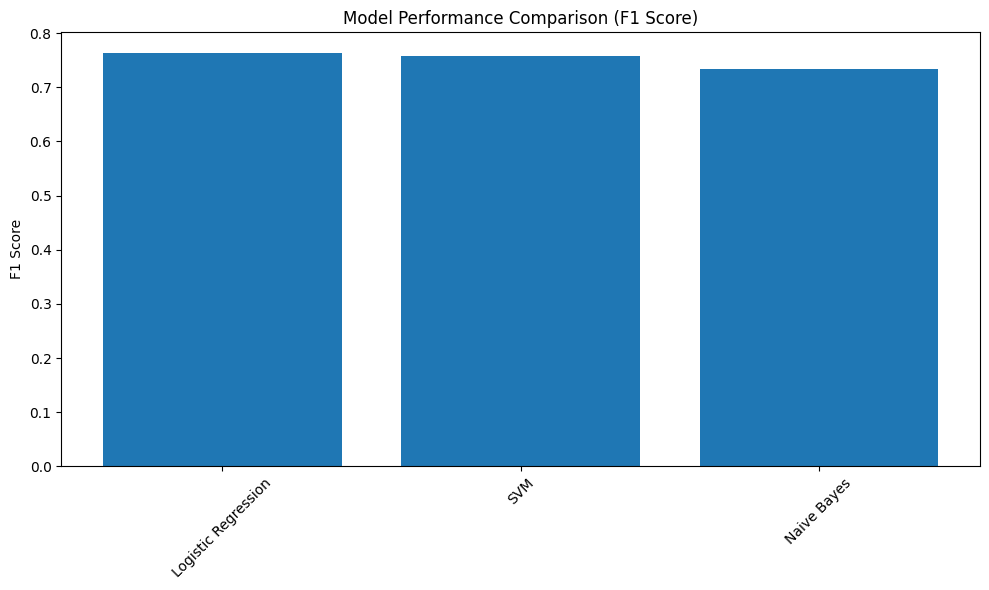

In [43]:
def plot_model_comparison(results):
    # Extract F1 scores for each model
    model_f1 = {
        name: results[name]['report']['weighted avg']['f1-score']
        for name in results.keys()
    }
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(model_f1.keys(), model_f1.values())
    plt.title('Model Performance Comparison (F1 Score)')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot comparison
plot_model_comparison(model_results)

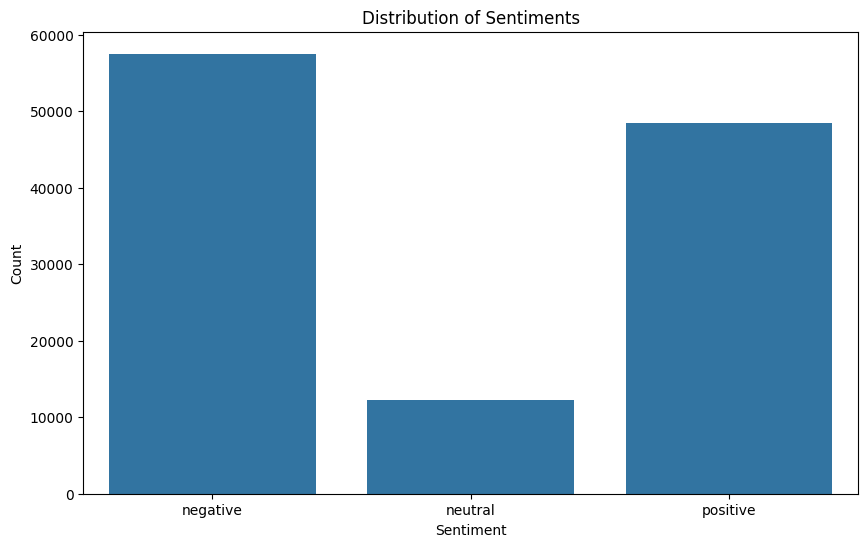


Sentiment Distribution:
negative: 57537 reviews (48.62%)
positive: 48518 reviews (41.00%)
neutral: 12278 reviews (10.38%)


In [44]:
def analyze_sentiment_distribution(df):
    # Create sentiment distribution plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='sentiment', order=['negative', 'neutral', 'positive'])
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
    
    # Print sentiment statistics
    sentiment_stats = df['sentiment'].value_counts().to_dict()
    total = sum(sentiment_stats.values())
    
    print("\nSentiment Distribution:")
    for sentiment, count in sentiment_stats.items():
        percentage = (count/total) * 100
        print(f"{sentiment}: {count} reviews ({percentage:.2f}%)")

# Analyze sentiment distribution
analyze_sentiment_distribution(df)

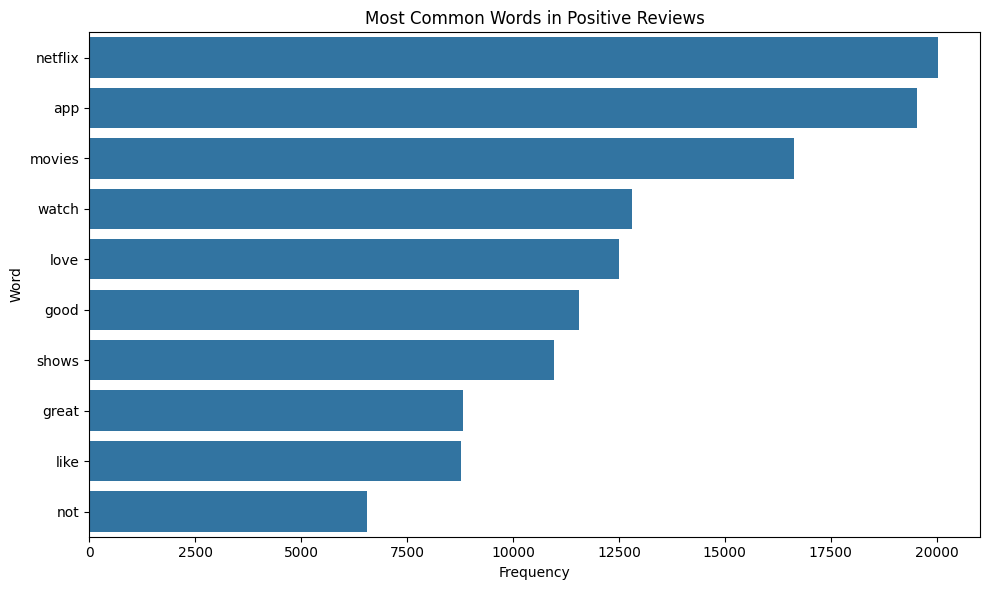

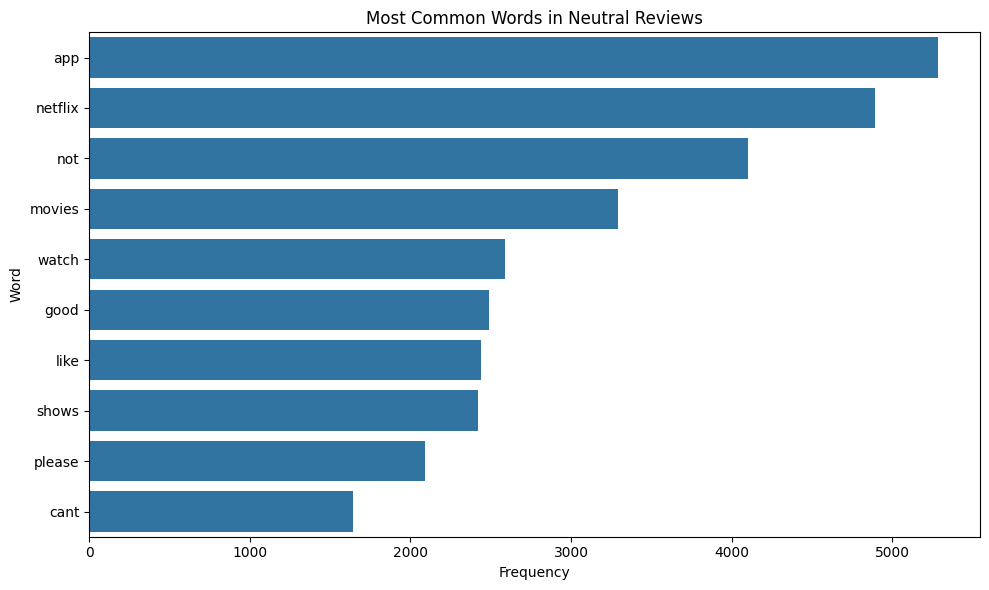

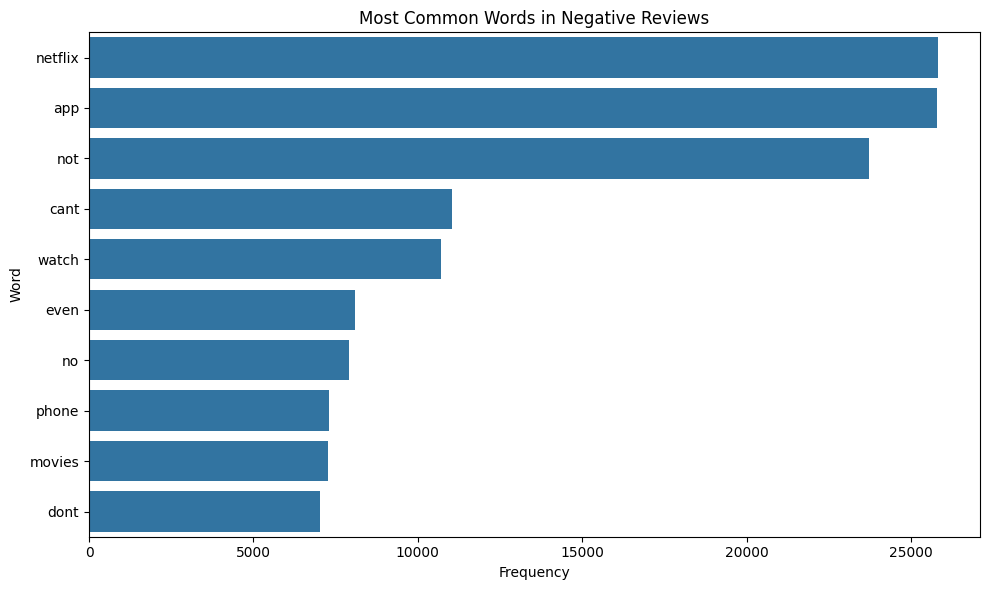

In [45]:
from collections import Counter

def analyze_common_words(df, sentiment_type, n=10):
    # Get all words from reviews of specified sentiment
    words = ' '.join(df[df['sentiment'] == sentiment_type]['processed_content']).split()
    
    # Count word frequencies
    word_freq = Counter(words)
    
    # Create DataFrame of most common words
    common_words = pd.DataFrame(word_freq.most_common(n), 
                              columns=['Word', 'Frequency'])
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=common_words, x='Frequency', y='Word')
    plt.title(f'Most Common Words in {sentiment_type.title()} Reviews')
    plt.tight_layout()
    plt.show()

# Analyze common words for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    analyze_common_words(df, sentiment)

In [48]:
import joblib

def select_best_model(results):
    # Compare F1 scores
    f1_scores = {
        name: results[name]['report']['weighted avg']['f1-score']
        for name in results.keys()
    }
    
    # Get best model name
    best_model_name = max(f1_scores.items(), key=lambda x: x[1])[0]
    return best_model_name

# Select and save best model
best_model_name = select_best_model(model_results)
print(f"\nBest performing model: {best_model_name}")

# Save the best model
best_model = models[best_model_name]
joblib.dump(best_model, 'best_netflix_review_model.joblib')
joblib.dump(tfidf_vectorizer, 'netflix_tfidf_vectorizer.joblib')

print("\nModel and vectorizer saved successfully!")


Best performing model: Logistic Regression

Model and vectorizer saved successfully!
